In [198]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler

In [199]:
data = pd.read_csv("House_data.csv")
data= data.drop(["id", "date", "waterfront", "view", "yr_renovated", "zipcode", "lat", "long"],axis=1)
colnames = list(data.columns.values)
print(colnames)

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


### apply normalization and PCA before KMeans

                 PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8
price          0.301  0.302  0.021 -0.288 -0.131 -0.004 -0.221  0.005
bedrooms       0.242  0.179  0.016  0.385  0.091  0.114  0.595  0.482
bathrooms      0.358  0.032 -0.091  0.134  0.140  0.138  0.169 -0.260
sqft_living    0.395  0.159  0.064  0.084  0.028  0.013 -0.081  0.068
sqft_lot       0.092 -0.211  0.593 -0.207  0.120  0.196  0.097 -0.022
floors         0.230 -0.245 -0.318 -0.196 -0.106  0.423  0.255 -0.198
condition     -0.075  0.322  0.237  0.214 -0.705  0.121  0.200 -0.452
grade          0.369  0.038 -0.072 -0.125 -0.055  0.015 -0.244 -0.111
sqft_above     0.386 -0.079 -0.028 -0.035 -0.237  0.075 -0.059  0.262
sqft_basement  0.098  0.479  0.185  0.240  0.502 -0.115 -0.056 -0.348
yr_built       0.223 -0.392 -0.204  0.149  0.208 -0.097  0.069 -0.468
lat            0.029  0.277 -0.114 -0.664  0.062 -0.378  0.500 -0.073
long           0.154 -0.355  0.154  0.205 -0.215 -0.699  0.180 -0.045
sqft_living15  0.349

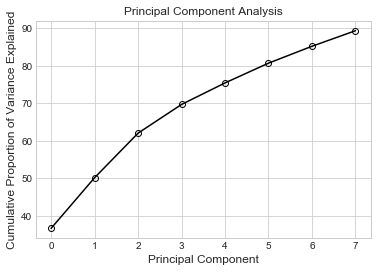

In [200]:
scaler = StandardScaler()
data_std = scaler.fit_transform(data) 
# data_std[0:2]
n_components = 8
pca = PCA(n_components).fit(data_std)  # fit in standarized data
PCs=[]
for l in range(1,n_components+1):
    PCs.append("PC"+str(l))

eigenvectors = np.round(pca.components_.transpose(),decimals=3)
eigenvalues = pca.explained_variance_
print(pd.DataFrame(eigenvectors,index=colnames,columns=PCs),'\n')
print(eigenvalues)
loadings= np.sqrt(eigenvalues)*eigenvectors
print(pd.DataFrame(np.round(loadings,decimals=4),index=colnames,columns=PCs),'\n')
expln_variance_ratio = np.round(pca.explained_variance_ratio_ * 100,decimals=2)  # 
eigval = -np.sort(-eigenvalues) #'-'=descending

npc = n_components # display
print("Eigenvalues                      :",np.round(eigval[0:npc],decimals=3))
print("Eigenvalues (%Explained_Variance):",expln_variance_ratio[0:npc])
print("Eigenvalues (%Cumulative)        :",np.cumsum(expln_variance_ratio[0:npc]))

plt.style.use('seaborn-whitegrid')
cumulative_var = np.cumsum(expln_variance_ratio)
plt.plot(cumulative_var,'k-o',markerfacecolor='None',markeredgecolor='k')
plt.title('Principal Component Analysis',fontsize=12)
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Cumulative Proportion of Variance Explained",fontsize=12)
plt.show()


## PC1 charactered by large overall size and number of rooms
## PC2 charactered by large sqft_basement and relatively yong age and good condition
## PC3 charactered by sqft_lot and sqft_lot15
etc

In [201]:
new_data = pca.transform(data_std) # used for downstream analytics
print(new_data)

[[-2.53368154 -0.50523837 -0.11447629 ... -0.16095267 -0.38106876
   0.84509416]
 [ 0.01534356  0.56066586 -0.72062231 ...  0.49206167  0.45518068
   0.20875477]
 [-2.88106551 -0.05644537  0.13208589 ... -1.45119915 -0.50993907
   0.77917113]
 ...
 [-2.28442963 -1.4442232  -1.34358708 ...  0.31081445 -0.19308383
  -0.96931687]
 [ 0.01889485 -1.71100102 -1.20699142 ... -0.27597063  0.42792912
  -0.78664405]
 [-2.35824848 -1.4882687  -1.35895583 ...  0.31114856 -0.1524499
  -0.95336458]]


In [181]:
# data.hist(alpha=0.5, bins = 10, color='blue', figsize=(8, 8))
# plt.tight_layout()
# plt.show()

In [182]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

### looping for number of clusters

In [183]:
min_clusters = 2
max_clusters = 10
sse = {}
for i in range (min_clusters, max_clusters):
    kmeans = KMeans(i,init="k-means++", n_init = 10, max_iter= 100)
    kmeans.fit(new_data) 
    predicted = kmeans.predict(new_data)
    
    goodness = silhouette_score(new_data,predicted)
    print("No Clusters =", i," Silhouette = ",goodness)
    sse[i] = kmeans.inertia_
print(sse)

No Clusters = 2  Silhouette =  0.30048181102175775
No Clusters = 3  Silhouette =  0.23515475249940127
No Clusters = 4  Silhouette =  0.2517285415118283
No Clusters = 5  Silhouette =  0.26473549281014935
No Clusters = 6  Silhouette =  0.24274724025819147
No Clusters = 7  Silhouette =  0.21878192482956899
No Clusters = 8  Silhouette =  0.2059697524897487
No Clusters = 9  Silhouette =  0.19430386226093418
{2: 187725.78114923465, 3: 161370.39252336946, 4: 141332.95856881354, 5: 119115.15395412757, 6: 109293.44071361782, 7: 101536.93128124264, 8: 96516.16408185007, 9: 92057.52747094844}


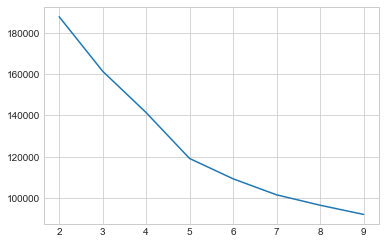

In [184]:
plt.figure()
keys = list(sse.keys())
vals = list(sse.values())
            
plt.plot(keys, vals)

### choosing cluster as 5 using following Elbow method

In [188]:
clusters = 5
kmeans = KMeans(clusters, init='k-means++', n_init = 10, max_iter= 100)
kmeans.fit(new_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [189]:
temp = pd.DataFrame(new_data,columns=PCs)

temp["Cluster"] = kmeans.predict(new_data)  # add Cluster column to the data
# find number of members in each cluster
count = temp.groupby('Cluster')['Cluster'].count()

# aggregate to cluster averages
cluster_means = np.round(temp.groupby(['Cluster']).mean(),decimals=3)
print(cluster_means)

           PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8
Cluster                                                        
0        2.314  1.740  8.247  0.513  0.412 -0.269  0.666 -0.146
1        0.039  1.487 -0.520  0.501  0.156 -0.129 -0.037 -0.065
2       -2.132  0.100  0.114 -0.245 -0.213  0.221 -0.082  0.094
3        4.318  0.150 -0.312 -0.477 -0.376  0.199 -0.119  0.048
4        0.757 -1.419 -0.050  0.096  0.281 -0.247  0.145 -0.081


In [190]:
cluster_means['Count'] = count
arr = np.transpose(cluster_means.to_numpy())
print(arr)

[[ 2.314e+00  3.900e-02 -2.132e+00  4.318e+00  7.570e-01]
 [ 1.740e+00  1.487e+00  1.000e-01  1.500e-01 -1.419e+00]
 [ 8.247e+00 -5.200e-01  1.140e-01 -3.120e-01 -5.000e-02]
 [ 5.130e-01  5.010e-01 -2.450e-01 -4.770e-01  9.600e-02]
 [ 4.120e-01  1.560e-01 -2.130e-01 -3.760e-01  2.810e-01]
 [-2.690e-01 -1.290e-01  2.210e-01  1.990e-01 -2.470e-01]
 [ 6.660e-01 -3.700e-02 -8.200e-02 -1.190e-01  1.450e-01]
 [-1.460e-01 -6.500e-02  9.400e-02  4.800e-02 -8.100e-02]
 [ 3.250e+02  4.745e+03  7.803e+03  2.551e+03  6.189e+03]]


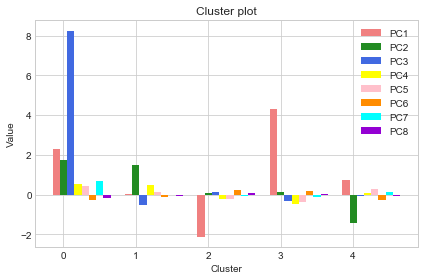

In [192]:
plt.figure()
bar_width = 0.1
index = np.arange(clusters)
rects1 = plt.bar(index, arr[0], bar_width,color='lightcoral',label='PC1')
rects2 = plt.bar(index + 1 * bar_width, arr[1], bar_width,color='forestgreen',label='PC2')
rects3 = plt.bar(index + 2 * bar_width, arr[2], bar_width,color='royalblue',label='PC3')
rects4 = plt.bar(index + 3 * bar_width, arr[3], bar_width,color='yellow',label='PC4')
rects5 = plt.bar(index + 4 * bar_width, arr[4], bar_width,color='pink',label='PC5')
rects6 = plt.bar(index + 5 * bar_width, arr[5], bar_width,color='darkorange',label='PC6')
rects7 = plt.bar(index + 6 * bar_width, arr[6], bar_width,color='cyan',label='PC7')
rects8 = plt.bar(index + 7 * bar_width, arr[7], bar_width,color='darkviolet',label='PC8')

plt.xlabel('Cluster')
plt.ylabel('Value')
plt.title('Cluster plot')
plt.xticks(index + bar_width, ('0', '1', '2', '3', '4'))
plt.legend()
plt.tight_layout()
plt.show()




### Conclusion
### cluster 0 feature by very large value of PC3, which is large sqft_lot and sqft_lot15
### Cluster 1 fearure by slightly high PC2, which is yong house age and good condition
### Cluster 2 fearure by small PC1, which is the overall size and number of rooms
### Cluster 3, opposed to cluster 2, features by large value of PC1
### Cluster 4, oppsing to cluster 1, fearure by and older house age and lower house condition

### The order of the clusters are random, so you may see clusters in a different sequence



In [193]:
from sklearn.model_selection import train_test_split
ds1, ds2= train_test_split(new_data,test_size=1/2,random_state=42)  # split into 2 set, on the new data after PCA

### Cross validation
fit 2 dataset into  KMeans separately

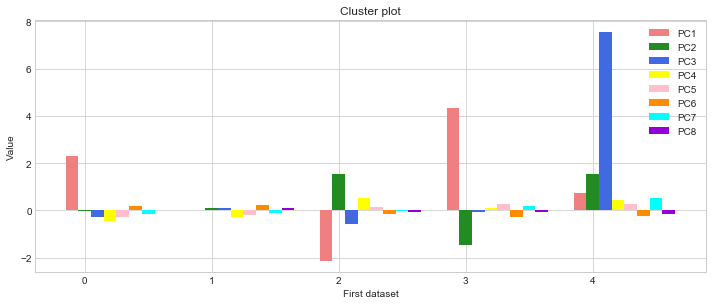

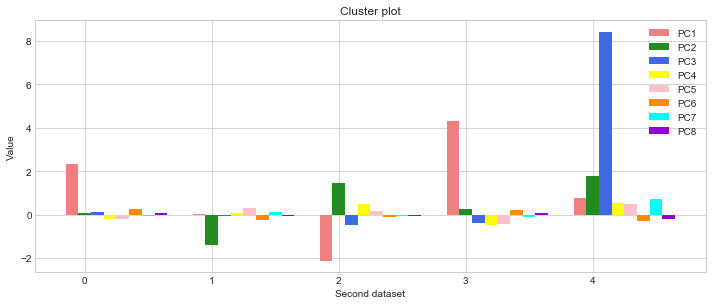

In [195]:

kmeans1 = KMeans(clusters, init='k-means++', n_init = 10, max_iter= 100)
kmeans1.fit(ds1)
temp1 = pd.DataFrame(ds1,columns=PCs)

temp1["Cluster"] = kmeans1.predict(ds1)  # add Cluster column to the data
# find number of members in each cluster
count1 = temp1.groupby('Cluster')['Cluster'].count()

# aggregate to cluster averages
cluster_means1 = np.round(temp1.groupby(['Cluster']).mean(),decimals=3)

cluster_means1['Count'] = count1
arr1 = np.transpose(cluster_means1.to_numpy())


plt.figure(figsize=(10,8))
plt.subplot(2, 1, 1)
bar_width = 0.1
index = np.arange(clusters)
rects1 = plt.bar(index, arr[0], bar_width,color='lightcoral',label='PC1')
rects2 = plt.bar(index + 1 * bar_width, arr1[1], bar_width,color='forestgreen',label='PC2')
rects3 = plt.bar(index + 2 * bar_width, arr1[2], bar_width,color='royalblue',label='PC3')
rects4 = plt.bar(index + 3 * bar_width, arr1[3], bar_width,color='yellow',label='PC4')
rects5 = plt.bar(index + 4 * bar_width, arr1[4], bar_width,color='pink',label='PC5')
rects6 = plt.bar(index + 5 * bar_width, arr1[5], bar_width,color='darkorange',label='PC6')
rects7 = plt.bar(index + 6 * bar_width, arr1[6], bar_width,color='cyan',label='PC7')
rects8 = plt.bar(index + 7 * bar_width, arr1[7], bar_width,color='darkviolet',label='PC8')

plt.xlabel('First dataset')
plt.ylabel('Value')
plt.title('Cluster plot')
plt.xticks(index + bar_width, ('0', '1', '2', '3', '4'))
plt.legend()
plt.tight_layout()
plt.show()

kmeans2 = KMeans(clusters, init='k-means++', n_init = 10, max_iter= 100)
kmeans2.fit(ds2)
temp2 = pd.DataFrame(ds2,columns=PCs)

temp2["Cluster"] = kmeans2.predict(ds2)  # add Cluster column to the data
# find number of members in each cluster
count2 = temp2.groupby('Cluster')['Cluster'].count()

# aggregate to cluster averages
cluster_means2 = np.round(temp2.groupby(['Cluster']).mean(),decimals=3)

cluster_means2['Count'] = count2
arr2 = np.transpose(cluster_means2.to_numpy())

plt.figure(figsize=(10,8))
plt.subplot(2, 1, 2)
bar_width = 0.1
index = np.arange(clusters)
rects1 = plt.bar(index, arr[0], bar_width,color='lightcoral',label='PC1')
rects2 = plt.bar(index + 1 * bar_width, arr2[1], bar_width,color='forestgreen',label='PC2')
rects3 = plt.bar(index + 2 * bar_width, arr2[2], bar_width,color='royalblue',label='PC3')
rects4 = plt.bar(index + 3 * bar_width, arr2[3], bar_width,color='yellow',label='PC4')
rects5 = plt.bar(index + 4 * bar_width, arr2[4], bar_width,color='pink',label='PC5')
rects6 = plt.bar(index + 5 * bar_width, arr2[5], bar_width,color='darkorange',label='PC6')
rects7 = plt.bar(index + 6 * bar_width, arr2[6], bar_width,color='cyan',label='PC7')
rects8 = plt.bar(index + 7 * bar_width, arr2[7], bar_width,color='darkviolet',label='PC8')

plt.xlabel('Second dataset')
plt.ylabel('Value')
plt.title('Cluster plot')
plt.xticks(index + bar_width, ('0', '1', '2', '3', '4'))
plt.legend()
plt.tight_layout()
plt.show()


### Conclusion:
we can see very similar cluster getting created for the 2 dataset
but each run may generate clusters slightly differently

### development and Validation
apply model from first Kmeans on 2nd dataset

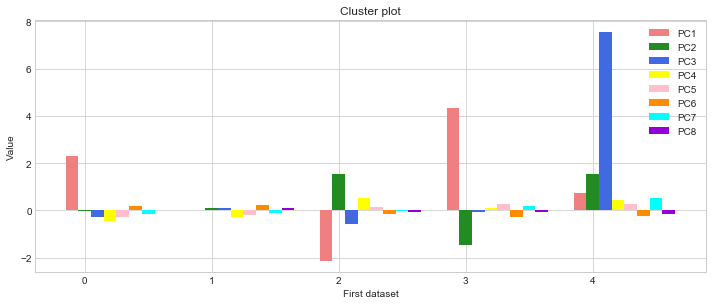

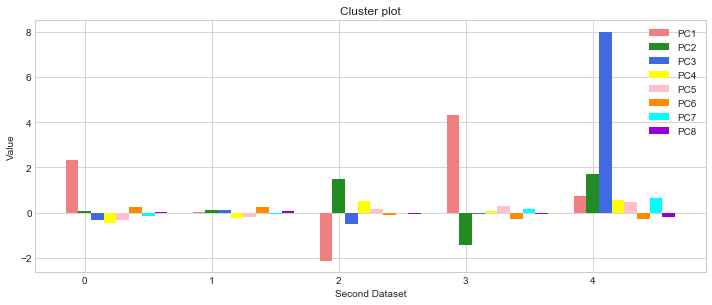

In [196]:

temp2 = pd.DataFrame(ds2,columns=PCs)
temp2["Cluster"] = kmeans1.predict(ds2)  # add Cluster column to the data
# find number of members in each cluster
count2 = temp2.groupby('Cluster')['Cluster'].count()

# aggregate to cluster averages
cluster_means2 = np.round(temp2.groupby(['Cluster']).mean(),decimals=3)

cluster_means2['Count'] = count2
arr2 = np.transpose(cluster_means2.to_numpy())


# First model
plt.figure(figsize=(10,8))
plt.subplot(2, 1, 1)
bar_width = 0.1
index = np.arange(clusters)
rects1 = plt.bar(index, arr[0], bar_width,color='lightcoral',label='PC1')
rects2 = plt.bar(index + 1 * bar_width, arr1[1], bar_width,color='forestgreen',label='PC2')
rects3 = plt.bar(index + 2 * bar_width, arr1[2], bar_width,color='royalblue',label='PC3')
rects4 = plt.bar(index + 3 * bar_width, arr1[3], bar_width,color='yellow',label='PC4')
rects5 = plt.bar(index + 4 * bar_width, arr1[4], bar_width,color='pink',label='PC5')
rects6 = plt.bar(index + 5 * bar_width, arr1[5], bar_width,color='darkorange',label='PC6')
rects7 = plt.bar(index + 6 * bar_width, arr1[6], bar_width,color='cyan',label='PC7')
rects8 = plt.bar(index + 7 * bar_width, arr1[7], bar_width,color='darkviolet',label='PC8')

plt.xlabel('First dataset')
plt.ylabel('Value')
plt.title('Cluster plot')
plt.xticks(index + bar_width, ('0', '1', '2', '3', '4'))
plt.legend()
plt.tight_layout()
plt.show()

# Second model
plt.figure(figsize=(10,8))
plt.subplot(2, 1, 2)
bar_width = 0.1
index = np.arange(clusters)
rects1 = plt.bar(index, arr[0], bar_width,color='lightcoral',label='PC1')
rects2 = plt.bar(index + 1 * bar_width, arr2[1], bar_width,color='forestgreen',label='PC2')
rects3 = plt.bar(index + 2 * bar_width, arr2[2], bar_width,color='royalblue',label='PC3')
rects4 = plt.bar(index + 3 * bar_width, arr2[3], bar_width,color='yellow',label='PC4')
rects5 = plt.bar(index + 4 * bar_width, arr2[4], bar_width,color='pink',label='PC5')
rects6 = plt.bar(index + 5 * bar_width, arr2[5], bar_width,color='darkorange',label='PC6')
rects7 = plt.bar(index + 6 * bar_width, arr2[6], bar_width,color='cyan',label='PC7')
rects8 = plt.bar(index + 7 * bar_width, arr2[7], bar_width,color='darkviolet',label='PC8')

plt.xlabel('Second Dataset')
plt.ylabel('Value')
plt.title('Cluster plot')
plt.xticks(index + bar_width, ('0', '1', '2', '3', '4'))
plt.legend()
plt.tight_layout()
plt.show()

### Conclusion
For this case the 2 dataset generate much more similar clusters, as compared to the cross-validation case